In [1]:
from tparton.m_evolution import evolve
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from scipy.special import gamma
# From Gehrmann (https://arxiv.org/pdf/hep-ph/9512406)
n = 3000
x = np.power(10, np.linspace(np.log10(1/3000), 0, n))
x = np.concatenate(([0], x))

def A(a, b, g, rho):
    return (1 + g * a / (a + b + 1)) \
        * gamma(a) * gamma(b+1) / gamma(a + b + 1) \
        + rho * gamma(a + 0.5) * gamma(b + 1) / gamma(a + b + 1.5)

def pdf_u(x, eta_u=0.918, a_u=0.512, b_u=3.96, gamma_u=11.65, rho_u=-4.60):
    return eta_u / A(a_u, b_u, gamma_u, rho_u) * np.power(x, a_u) * np.power(1-x, b_u) * (1 + gamma_u * x + rho_u * np.sqrt(x))

def pdf_d(x, eta_d=-0.339, a_d=0.780, b_d=4.96, gamma_d=7.81, rho_d=-3.48):
    return pdf_u(x, eta_d, a_d, b_d, gamma_d, rho_d)

u = np.stack((x, pdf_u(x))).T
d = np.stack((x, pdf_d(x))).T
u_evolved = evolve(u, Q0_2=4, Q2=200, n_x=n, l_QCD=0.231, n_f=4, morp='minus', verbose=True, alpha_num=True)
d_evolved = evolve(d, Q0_2=4, Q2=200, n_x=n, l_QCD=0.231, n_f=4, morp='minus', verbose=True, alpha_num=True)

0.0003332222592469177 0.0164438496824504
0.0006664445184938354 0.0259015382984724
0.000999666777740753 0.031507396809223
0.0013328890369876708 0.0354803619842377
0.0016661112962345886 0.0386347567308191
0.001999333555481506 0.0413568108052422
0.002332555814728424 0.0437807267763264
0.0026657780739753416 0.0459830014954325
0.002999000333222259 0.0480245196473714
0.003332222592469177 0.0498944812915755
0.0036654448517160947 0.0516313411362447
0.003998667110963012 0.0532504230767479
0.00433188937020993 0.0547646448160163
0.004665111629456848 0.0561852331997275
0.004998333888703766 0.0575220586855544
0.005331556147950683 0.0587838448432635
0.005664778407197601 0.05997829324442
0.005998000666444518 0.0611122102588068
0.006331222925691437 0.0621915655269578
0.006664445184938354 0.0632216071574063
0.006997667444185272 0.0642069694162488
0.007330889703432189 0.0651516990636198
0.007664111962679107 0.0660593680086552
0.007997334221926024 0.0669331390116462
0.008330556481172943 0.067775788127641

(0.001, 1.0, 0.0, 0.21)

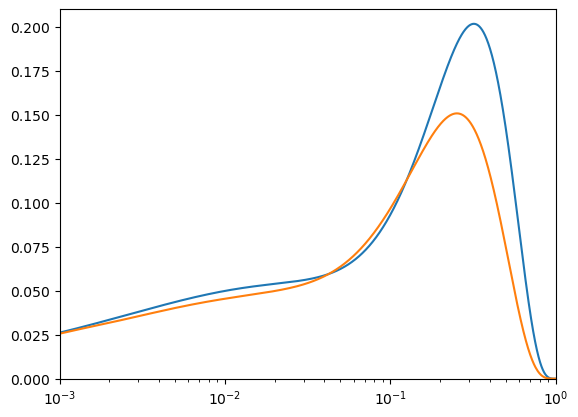

In [3]:
fig, ax = plt.subplots()
ax.plot(x, u[:,1]+d[:,1])
ax.plot(u_evolved[0], u_evolved[1]+d_evolved[1])
ax.set_xscale('log')
plt.axis([1e-3,1,0,0.21])

In [4]:
x = u[:,0]
y = u[:,1]-d[:,1]
diff = np.stack((x,y)).T
output_plus = evolve(diff, Q0_2=4, Q2=200, n_x=n, l_QCD=0.231, n_f=4, morp='plus', verbose=True, alpha_num=True)
output_minus = evolve(diff, Q0_2=4, Q2=200, n_x=n, l_QCD=0.231, n_f=4, morp='minus', verbose=True, alpha_num=True)

0.0003332222592469177 0.0189598042819548
0.0006664445184938354 0.0304340857023082
0.000999666777740753 0.037613856319744
0.0013328890369876708 0.0429328154500664
0.0016661112962345886 0.0472952289924507
0.001999333555481506 0.0511347499937663
0.002332555814728424 0.0546056829425185
0.0026657780739753416 0.0578185681778763
0.002999000333222259 0.0607812129748102
0.003332222592469177 0.0635481969152678
0.0036654448517160947 0.0661434717314992
0.003998667110963012 0.0685861200461663
0.00433188937020993 0.0708922309424233
0.004665111629456848 0.0730757702195378
0.004998333888703766 0.0751489899389667
0.005331556147950683 0.0771227254743617
0.005664778407197601 0.0790065423681989
0.005998000666444518 0.0808088889085464
0.006331222925691437 0.0825372335712976
0.006664445184938354 0.0841981178520124
0.006997667444185272 0.0857973697383338
0.007330889703432189 0.0873400908396745
0.007664111962679107 0.088830820245371
0.007997334221926024 0.0902735749231661
0.008330556481172943 0.09167192380295

(0.0, 0.0002)

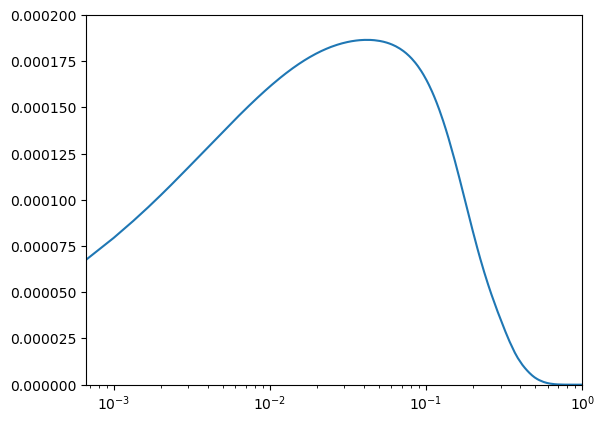

In [5]:
x = output_plus[0]
output = (output_plus[1] - output_minus[1]) / 2
plt.plot(x, output)
plt.xscale('log')
plt.xlim([2/3000, 1])
plt.ylim([0, 0.0002])

In [6]:
np.savez('vogelsang-exact_alpha.npz', x=x, upd=u[:,1]+d[:,1], evolved_x=u_evolved[0], u_evolved=u_evolved[1], d_evolved=d_evolved[1], output_plus=output_plus[1], output_minus=output_minus[1], output=output)